In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

# Retrieving data from folders and converting to np array

In [2]:
data = []
labels = []
classes = 43
train_path = os.getcwd()

for i in range(classes):
    train_data_path = os.path.join(train_path,"Train",str(i))
    images = os.listdir(train_data_path)
    
    for img in images:
        try:
            image = Image.open(train_data_path + "\\" + img)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")


In [32]:
data = np.array(data)
labels = np.array(labels)

In [36]:
# data[0][0][0][0]

In [34]:
print(data.shape)
print(labels.shape)

(39209, 30, 30, 3)
(39209,)


# Train/Test split and one - hot encoding

In [57]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.utils import to_categorical

In [58]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [59]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(31367, 30, 30, 3) (31367,) (7842, 30, 30, 3) (7842,)


In [60]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Building CNN model

In [61]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [62]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.25))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(43, activation = 'softmax'))

# Compilation of model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

C:\Users\Mukteshwar Nath\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Train and validate model

In [76]:
history = model.fit(X_train, y_train, batch_size = 64, epochs = 15, validation_data = (X_test,y_test))

Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 238s 476ms/step - accuracy: 0.3009 - loss: 3.6185 - val_accuracy: 0.8924 - val_loss: 0.4607
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 253s 457ms/step - accuracy: 0.8002 - loss: 0.6975 - val_accuracy: 0.9615 - val_loss: 0.1753
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 199s 404ms/step - accuracy: 0.8810 - loss: 0.4073 - val_accuracy: 0.9647 - val_loss: 0.1409
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 230s 469ms/step - accuracy: 0.9117 - loss: 0.2949 - val_accuracy: 0.9697 - val_loss: 0.1055
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 233s 408ms/step - accuracy: 0.9289 - loss: 0.2327 - val_accuracy: 0.9813 - val_loss: 0.0673
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 208s 421ms/step - accuracy: 0.9423 - loss: 0.1939 - val_accuracy: 0.9784 - val_loss: 0.0825
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 263s 423ms/step - accuracy: 0.9413 - loss: 0.2076 - val_accuracy: 0.9843 - val_loss: 0.0580
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 254s 407ms/step - accuracy: 0.9544 -

In [84]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

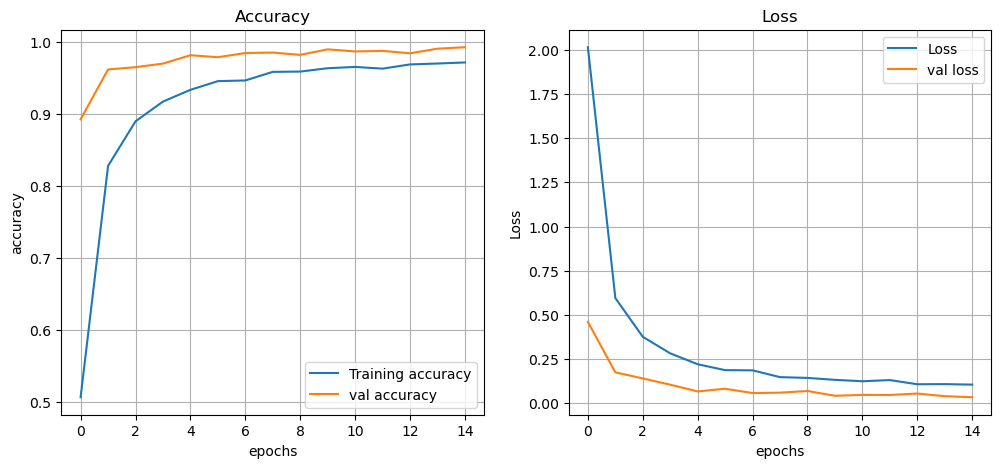

In [96]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.show()

# Testing the model

In [2]:
from sklearn.metrics import accuracy_score
df = pd.read_csv(r"D:\My\Studies\Summer training\DL\DL project\Test.csv")

In [3]:
labels1 = df["ClassId"].values
imgs = df["Path"].values
data1 = []
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data1.append(np.array(image))
    
test_data = np.array(data1)
pred = model.predict(test_data)
pred_value = np.argmax(pred, axis = 1)

NameError: name 'data' is not defined

In [114]:
#Accuracy with the test data

print(accuracy_score(labels, pred_value))
model.save('traffic_classifier.keras')

0.9588281868566905


In [9]:
sign_names = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',      
            3:'Speed limit (50km/h)',       
            4:'Speed limit (60km/h)',      
            5:'Speed limit (70km/h)',    
            6:'Speed limit (80km/h)',      
            7:'End of speed limit (80km/h)',     
            8:'Speed limit (100km/h)',    
            9:'Speed limit (120km/h)',     
           10:'No passing',   
           11:'No passing veh over 3.5 tons',     
           12:'Right-of-way at intersection',     
           13:'Priority road',    
           14:'Yield',     
           15:'Stop',       
           16:'No vehicles',       
           17:'Veh > 3.5 tons prohibited',       
           18:'No entry',       
           19:'General caution',     
           20:'Dangerous curve left',      
           21:'Dangerous curve right',   
           22:'Double curve',      
           23:'Bumpy road',     
           24:'Slippery road',       
           25:'Road narrows on the right',  
           26:'Road work',    
           27:'Traffic signals',      
           28:'Pedestrians',     
           29:'Children crossing',     
           30:'Bicycles crossing',       
           31:'Beware of ice/snow',
           32:'Wild animals crossing',      
           33:'End speed + passing limits',      
           34:'Turn right ahead',     
           35:'Turn left ahead',       
           36:'Ahead only',      
           37:'Go straight or right',      
           38:'Go straight or left',      
           39:'Keep right',     
           40:'Keep left',      
           41:'Roundabout mandatory',     
           42:'End of no passing',      
           43:'End no passing veh > 3.5 tons' }

# Manual Prediction

In [4]:
from keras.models import load_model

In [5]:
model1 = load_model("traffic_classifier.keras")

C:\Users\Mukteshwar Nath\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [11]:
img_new = Image.open(r'D:\My\Studies\Summer training\DL\DL project\Test\00024.png')
img_new = img_new.convert("RGB")
img_new = img_new.resize((30,30))
img1_new = np.array(img_new)
img1_new = np.expand_dims(img1_new, axis = 0)

In [12]:
pred_new = model1.predict(img1_new)
pred_label = np.argmax(pred_new, axis=1)[0]
pred_label+=1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Predicted sign :  Speed limit (30km/h)


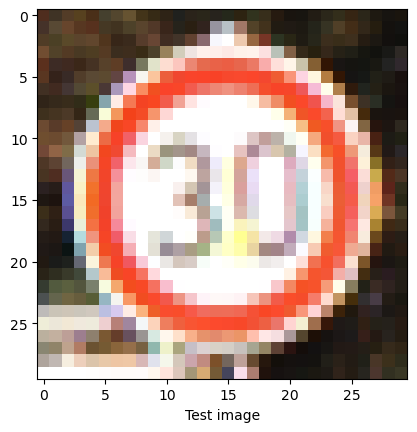

In [13]:
plt.xlabel("Test image")
plt.imshow(img_new)
print("Predicted sign : ", sign_names[pred_label])